In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tenseal as ts
import tensorflow as tf

2023-01-27 12:10:05.152675: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 12:10:05.424140: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-27 12:10:05.424157: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-27 12:10:06.386120: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
data = np.random.rand(10000).reshape((-1, 1))
y = data < 0.5
y = y.reshape((-1, 1))

In [4]:
data_test = np.random.rand(1000).reshape((-1, 1))
y_test = data_test < 0.5
y_test = y_test.reshape((-1, 1))


In [5]:
sample_model = tf.keras.Sequential()
sample_model.add(tf.keras.layers.Input((None, 1)))
sample_model.add(tf.keras.layers.Dense(16, activation="sigmoid"))
sample_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


2023-01-27 12:10:07.840497: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-27 12:10:07.840736: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-27 12:10:07.840762: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elina-G3-3500): /proc/driver/nvidia/version does not exist
2023-01-27 12:10:07.841321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
sample_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
sample_model.fit(data, y, validation_data=(data_test, y_test), epochs=4, batch_size=10)


Epoch 1/4
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6096 - accuracy: 0.9145 - val_loss: 0.5136 - val_accuracy: 0.9780
Epoch 2/4
1000/1000 [==============================] - 1s 788us/step - loss: 0.4081 - accuracy: 0.9843 - val_loss: 0.3039 - val_accuracy: 0.9990
Epoch 3/4
1000/1000 [==============================] - 1s 784us/step - loss: 0.2492 - accuracy: 0.9898 - val_loss: 0.1937 - val_accuracy: 0.9870
Epoch 4/4
1000/1000 [==============================] - 1s 763us/step - loss: 0.1716 - accuracy: 0.9936 - val_loss: 0.1407 - val_accuracy: 0.9890


In [8]:
import torch
import torch.nn as nn

data = np.random.rand(10000).reshape((-1, 1))
y = data < 0.5
y = y.reshape((-1, 1))

data_test = np.random.rand(1000).reshape((-1, 1))
y_test = data_test < 0.5
y_test = y_test.reshape((-1, 1))

y = y.astype(float)
y_test = y_test.astype(float)

data = torch.from_numpy(data)
y = torch.from_numpy(y)
data_test = torch.from_numpy(data_test)
y_test = torch.from_numpy(y_test)

y = y.type(torch.float32)
y_test = y_test.type(torch.float32)

data = data.type(torch.float32)
data_test = data_test.type(torch.float32)


class SampleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 16)
        self.layer2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        # print(x)
        return x


sample_model = SampleModel()
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(sample_model.parameters())
batch_size = 10
data = torch.split(data, batch_size)
y = torch.split(y, batch_size)

for epoch in range(4):
    for i in range(len(data)):
        optimizer.zero_grad()
        output = sample_model(data[i])
        loss = loss_fn(output, y[i])
        loss.backward()
        optimizer.step()
        accuracy = (output.round() == y[i]).float().mean()
        print('Epoch {} Loss {} Accuracy {}'.format(epoch, loss.item(), accuracy))

with torch.no_grad():
    output_test = sample_model(data_test)
    accuracy_test = (output_test.round() == y_test).float().mean()
    print('Test Accuracy:', accuracy_test.item())

Epoch 0 Loss 0.6828716993331909 Accuracy 0.699999988079071
Epoch 0 Loss 0.6895090937614441 Accuracy 0.6000000238418579
Epoch 0 Loss 0.706517219543457 Accuracy 0.4000000059604645
Epoch 0 Loss 0.7069393992424011 Accuracy 0.4000000059604645
Epoch 0 Loss 0.7078315615653992 Accuracy 0.4000000059604645
Epoch 0 Loss 0.6881425976753235 Accuracy 0.6000000238418579
Epoch 0 Loss 0.6703822016716003 Accuracy 0.800000011920929
Epoch 0 Loss 0.6885309815406799 Accuracy 0.6000000238418579
Epoch 0 Loss 0.698070228099823 Accuracy 0.5
Epoch 0 Loss 0.6977242827415466 Accuracy 0.5
Epoch 0 Loss 0.6975101232528687 Accuracy 0.5
Epoch 0 Loss 0.7175335884094238 Accuracy 0.30000001192092896
Epoch 0 Loss 0.6970621943473816 Accuracy 0.5
Epoch 0 Loss 0.6973863840103149 Accuracy 0.5
Epoch 0 Loss 0.6970797777175903 Accuracy 0.5
Epoch 0 Loss 0.7155755162239075 Accuracy 0.30000001192092896
Epoch 0 Loss 0.6885615587234497 Accuracy 0.6000000238418579
Epoch 0 Loss 0.6786136627197266 Accuracy 0.699999988079071
Epoch 0 Loss 

# Encrypting data


In [9]:
# Create the TenSEAL security context
def create_ctx():
    """Helper for creating the CKKS context.
    CKKS params:
        - Polynomial degree: 8192.
        - Coefficient modulus size: [40, 21, 21, 21, 21, 21, 21, 40].
        - Scale: 2 ** 21.
        - The setup requires the Galois keys for evaluating the convolutions.
    """
    bits_scale = 26

    poly_mod_degree = 16384

    coeff_mod_bit_sizes = [31, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale, bits_scale,
                           bits_scale, 31]
    ctx = ts.context(ts.SCHEME_TYPE.CKKS, poly_mod_degree, -1, coeff_mod_bit_sizes)
    ctx.global_scale = pow(2, bits_scale)
    ctx.generate_galois_keys()

    # We prepare the context for the server, by making it public(we drop the secret key)
    server_context = ctx.copy()
    server_context.make_context_public()

    return ctx, server_context



In [10]:
# Helper for encoding the image
def prepare_input(ctx, plain_input):
    enc_input = ts.ckks_vector(ctx, plain_input)
    return enc_input


def prepare_input_encrypted(context: bytes, ckks_vector: bytes) -> ts.CKKSVector:
    try:
        ctx = ts.context_from(context)
        enc_x = ts.ckks_vector_from(ctx, ckks_vector)
    except:
        raise DeserializationError("cannot deserialize context or ckks_vector")
    try:
        _ = ctx.galois_keys()
    except:
        raise InvalidContext("the context doesn't hold galois keys")
    return enc_x



In [11]:
context, server_context = create_ctx()


In [12]:
data = np.random.rand(10000).reshape((-1, 1))
y = data < 0.5
y = y.reshape((-1, 1))

data_test = np.random.rand(1000).reshape((-1, 1))
y_test = data_test < 0.5
y_test = y_test.reshape((-1, 1))


The following operations are disabled in this setup: matmul, matmul_plain, enc_matmul_plain, conv2d_im2col.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.


(array([6.109e+03, 2.394e+03, 9.440e+02, 3.470e+02, 1.320e+02, 4.500e+01,
        2.400e+01, 3.000e+00, 0.000e+00, 2.000e+00]),
 array([4.14641765e-10, 2.73004851e-05, 5.46005556e-05, 8.19006260e-05,
        1.09200696e-04, 1.36500767e-04, 1.63800837e-04, 1.91100908e-04,
        2.18400978e-04, 2.45701049e-04, 2.73001119e-04]),
 <BarContainer object of 10 artists>)

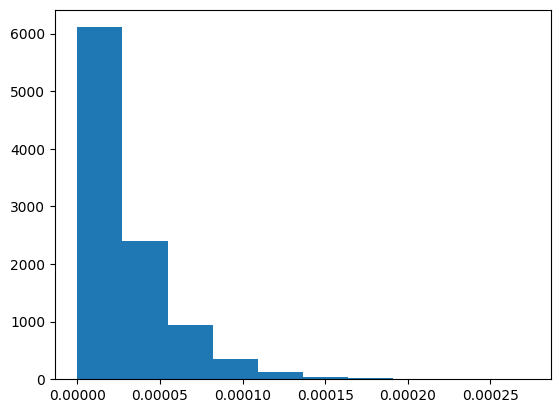

In [13]:
plt.hist(
    np.abs(np.array(prepare_input(context, data.reshape((-1, 10000))[0]).decrypt()) - data.reshape((-1, 10000)))[0])




# encrypted model

In [14]:
layer1_weight = sample_model.layer1.weight.T.data.tolist()
layer1_bias = sample_model.layer1.bias.data.tolist()
layer2_weight = sample_model.layer2.weight.T.data.tolist()
layer2_bias = sample_model.layer2.bias.data.tolist()

data = np.random.rand(1000).reshape((-1, 1))
y = data < 0.5
y = y.reshape((-1, 1))

data_test = np.random.rand(10).reshape((-1, 1))
y_test = data_test < 0.5
y_test = y_test.reshape((-1, 1))

# Decryption of result
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
loss = []
for data, target in zip(data, y):
    # Encoding and encryption
    x_enc = prepare_input(context, data)
    # Encrypted evaluation
    # conv layer
    # pack all channels into a single flattened vector
    # fc1 layer
    enc_x = x_enc.mm(layer1_weight) + layer1_bias
    enc_x = nn.Sigmoid()(torch.tensor(enc_x.decrypt()))
    enc_x = prepare_input(context, enc_x)
    # enc_x = -0.004*enc_x*enc_x*enc_x+ 0.197*enc_x + 0.5
    enc_output = enc_x.mm(layer2_weight) + layer2_bias
    # enc_output = -0.004*enc_x*enc_x*enc_x+ 0.197*enc_x + 0.5

    # Decryption of result
    output = enc_output.decrypt()
    output = nn.Sigmoid()(torch.tensor(output))

    output = torch.tensor(output).view(1, -1)
    print(f"for data: {data} we got output : {output}")
    # compute loss
    if (sample_model(torch.tensor(data).type(torch.float)) > 0.5) == (output > 0.5):
        loss.append(1)
    else:
        loss.append(0)

/tmp/ipykernel_400962/4037029950.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  output = torch.tensor(output).view(1, -1)


for data: [0.84314153] we got output : tensor([[0.0356]])
for data: [0.69927622] we got output : tensor([[0.1102]])
for data: [0.10943258] we got output : tensor([[0.9862]])
for data: [0.41922445] we got output : tensor([[0.7084]])
for data: [0.53654333] we got output : tensor([[0.3939]])
for data: [0.21688907] we got output : tensor([[0.9595]])
for data: [0.48367266] we got output : tensor([[0.5389]])
for data: [0.04066893] we got output : tensor([[0.9927]])
for data: [0.68583913] we got output : tensor([[0.1232]])
for data: [0.66580169] we got output : tensor([[0.1455]])
for data: [0.89399781] we got output : tensor([[0.0250]])
for data: [0.060259] we got output : tensor([[0.9913]])
for data: [0.26171306] we got output : tensor([[0.9356]])
for data: [0.84277026] we got output : tensor([[0.0357]])
for data: [0.81986668] we got output : tensor([[0.0422]])
for data: [0.9164547] we got output : tensor([[0.0216]])
for data: [0.75472844] we got output : tensor([[0.0700]])
for data: [0.5500

In [15]:
sum(loss) / len(loss)

1.0

# Trainable encrypted model

In [16]:
layer1_weight = sample_model.layer1.weight.T.data.tolist()
layer1_bias = sample_model.layer1.bias.data.tolist()
layer2_weight = sample_model.layer2.weight.T.data.tolist()
layer2_bias = sample_model.layer2.bias.data.tolist()


class EncryptedLR:

    def __init__(self, torch_lr):
        self.layer1_weight = torch_lr.layer1.weight.T.data.tolist()[0]
        self.layer1_bias = torch_lr.layer1.bias.data.tolist()
        self.layer2_weight = torch_lr.layer2.weight.T.data.tolist()[0]
        self.layer2_bias = torch_lr.layer2.bias.data.tolist()

        # we accumulate gradients and counts the number of iterations

        self._delta_w_1 = 0
        self._delta_b_1 = 0
        self._delta_w_2 = 0
        self._delta_b_2 = 0

        self._count_1 = 0
        self._count_2 = 0

    def forward(self, enc_x):
        enc_out = enc_x.dot(self.layer1_weight) + self.layer1_bias
        enc_out = EncryptedLR.sigmoid(enc_out)
        enc_out = enc_out.dot(self.layer2_weight) + self.layer2_bias
        enc_out = EncryptedLR.sigmoid(enc_out)
        return enc_out

    def backward(self, enc_x, enc_out, enc_y, layer_num):  # noqa
        out_minus_y = (enc_out - enc_y)  # noqa
        eval(f"self._delta_w_{layer_num} += enc_x * out_minus_y")
        eval(f"self._delta_b_{layer_num} += out_minus_y")
        eval(f"self._count_{layer_num} += 1")

    def update_parameters(self):
        if self._count == 0:
            raise RuntimeError("You should at least run one forward iteration")
        # update weights
        # We use a small regularization term to keep the output
        # of the linear layer in the range of the sigmoid approximation
        self.layer1_weight -= self._delta_w_1 * (1 / self._count_1) + self.weight * 0.05
        self.layer1_bias -= self._delta_b_1 * (1 / self._count_1)

        self.layer2_weight -= self._delta_w_2 * (1 / self._count_2) + self.weight * 0.05
        self.layer2_bias -= self._delta_b_2 * (1 / self._count_2)

        # reset gradient accumulators and iterations count

        self._delta_w_1 = 0
        self._delta_b_1 = 0
        self._delta_w_2 = 0
        self._delta_b_2 = 0

        self._count_1 = 0
        self._count_2 = 0

    @staticmethod
    def sigmoid(enc_x):
        # We use the polynomial approximation of degree 3
        # sigmoid(x) = 0.5 + 0.197 * x - 0.004 * x^3
        # from https://eprint.iacr.org/2018/462.pdf
        # which fits the function pretty well in the range [-5,5]
        return enc_x.polyval([0.5, 0.197, 0, -0.004])

    def plain_accuracy(self, x_test, y_test):
        # evaluate accuracy of the model on
        # the plain (x_test, y_test) dataset
        w_1 = torch.tensor(self.layer1_weight)
        b_1 = torch.tensor(self.layer1_bias)
        w_2 = torch.tensor(self.layer2_weight)
        b_2 = torch.tensor(self.layer2_bias)
        out = torch.sigmoid(x_test.matmul(w_1) + b_1).reshape(-1, 1)
        out = torch.sigmoid(out.matmul(w_2)+b_2).reshape(-1,1)
        correct = torch.abs(y_test - out) < 0.5
        return correct.float().mean()

    def encrypt(self, context):
        self.layer1_weight = ts.ckks_vector(context, self.layer1_weight)
        self.layer1_bias = ts.ckks_vector(context, self.layer1_bias)
        self.layer2_weight = ts.ckks_vector(context, self.layer2_weight)
        self.layer2_bias = ts.ckks_vector(context, self.layer2_bias)


    def decrypt(self):
        self.layer1_weight = self.layer1_weight.decrypt()
        self.layer1_bias = self.layer1_bias.decrypt()
        self.layer2_weight = self.layer2_weight.decrypt()
        self.layer2_bias = self.layer2_bias.decrypt()


    def __call__(self, *args, **kwargs):
        return self.forward(*args, **kwargs)

############# Data summary #############
x_train has shape: torch.Size([1024, 1])
y_train has shape: torch.Size([1024, 1])
x_test has shape: torch.Size([512, 1])
y_test has shape: torch.Size([512, 1])
#######################################
Encryption of the training_set took 41 seconds
Distribution on plain data - Layer 1:


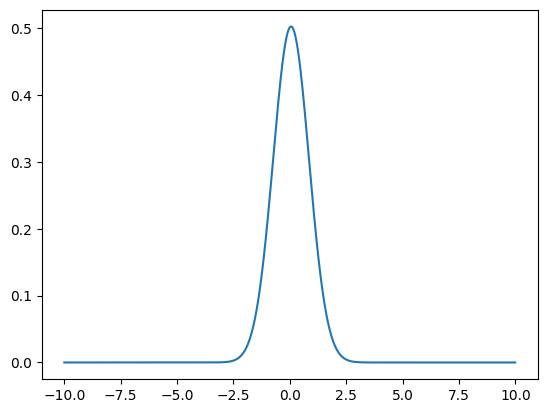

Distribution on encrypted data - Layer 1:


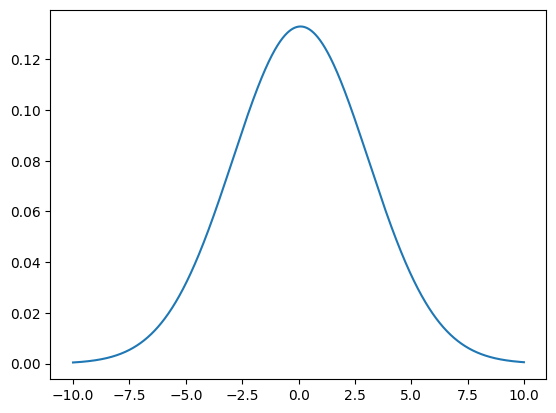

In [21]:
from time import time

def random_data(m=1024, n=1):
    # data separable by the line `y = x`
    x_train = torch.randn(m, n)
    x_test = torch.randn(m // 2, n)
    y_train = (x_train[:, 0] >= x_train[:, 0]).float().unsqueeze(0).t()
    y_test = (x_test[:, 0] >= x_test[:, 0]).float().unsqueeze(0).t()
    return x_train, y_train, x_test, y_test


# You can use whatever data you want without modification to the tutorial
# x_train, y_train, x_test, y_test = random_data()
x_train, y_train, x_test, y_test = random_data()

print("############# Data summary #############")
print(f"x_train has shape: {x_train.shape}")
print(f"y_train has shape: {y_train.shape}")
print(f"x_test has shape: {x_test.shape}")
print(f"y_test has shape: {y_test.shape}")
print("#######################################")
# parameters
poly_mod_degree = 8192
coeff_mod_bit_sizes = [40, 21, 21, 21, 21, 21, 21, 40]
# create TenSEALContext
t_start = time()
enc_x_train = [ts.ckks_vector(context, x.tolist()) for x in x_train]
enc_y_train = [ts.ckks_vector(context, y.tolist()) for y in y_train]
t_end = time()
print(f"Encryption of the training_set took {int(t_end - t_start)} seconds")


normal_dist = lambda x, mean, var: np.exp(- np.square(x - mean) / (2 * var)) / np.sqrt(2 * np.pi * var)

def plot_normal_dist(mean, var, rmin=-10, rmax=10):
    x = np.arange(rmin, rmax, 0.01)
    y = normal_dist(x, mean, var)
    fig = plt.plot(x, y)

# plain distribution
lr = SampleModel()
data = lr.layer1(x_test)
mean, var = map(float, [data.mean(), data.std() ** 2])
plot_normal_dist(mean, var)
print("Distribution on plain data - Layer 1:")
plt.show()
# encrypted distribution
# print(lr.layer2.weight.T.data.tolist()[0])
# data = lr.layer2.weight.T.data.tolist()[0]*(x_test) + lr.layer2.bias.data.tolist()
# mean, var = map(float, [data.mean(), data.std() ** 2])
# plot_normal_dist(mean, var)
# print("Distribution on plain data - Layer 2:")
# plt.show()





eelr = EncryptedLR(lr)
eelr.encrypt(context)

w_1 = eelr.layer1_weight
b_1 = eelr.layer1_bias
data = []
for enc_x in enc_x_train:
    enc_out = enc_x.dot(w_1) + b_1
    data.append(enc_out.decrypt())
data = torch.tensor(data)
mean, var = map(float, [data.mean(), data.std() ** 2])
plot_normal_dist(mean, var)
print("Distribution on encrypted data - Layer 1:")
plt.show()


# w_2 = eelr.layer2_weight
# b_2 = eelr.layer2_bias
# data = []
# for enc_x in enc_x_train:
#     enc_out = enc_x.dot(w_2) + b_2
#     data.append(enc_out.decrypt())
# data = torch.tensor(data)
# mean, var = map(float, [data.mean(), data.std() ** 2])
# plot_normal_dist(mean, var)
# print("Distribution on encrypted data - Layer 2:")
# plt.show()


# in-house developed remez for sigmoid

In [ ]:

from numpy.polynomial import Polynomial


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def approximate_sigmoid(x, precision):
    a = -5
    b = 5
    while (b - a) > precision:
        c = (a + b) / 2
        d = (b - a) / 2
        x_points = np.linspace(c - d, c + d, 10)
        y_points = sigmoid(x_points)
        p = Polynomial.fit(x_points, y_points, 6)
        y_c_poly = p(c)
        y_d_poly = p(c + d)
        if y_c_poly < y_d_poly:
            b = c + d
        else:
            a = c
    return p


In [718]:
import numpy as np
from scipy import optimize


def remez(f, a, b, n):
    # Initialize an arbitrary set of (n+2) points in the interval [a, b]
    x = np.linspace(a, b, n + 2)

    # Set the threshold for convergence
    eps = 1e-6

    while True:
        # Compute the coefficients of the polynomial using the current set of points
        A = np.vander(x - a, n + 1)
        error_coefs = np.array([[(-1) ** i] for i in range(len(x))])
        A = np.append(A, error_coefs, axis=1)

        c = np.linalg.solve(A, f(x))

        E = (error_coefs * c[-1]).flatten()
        c = c[:-1]
        # Compute the error function at the current set of points
        print("Error:")
        print(E)

        x_new = np.array([])
        calculated_pol = np.polynomial.Polynomial(np.flip(c))
        for i in range(n + 1):
            print(f" The x[{i}] is {x[i] - a} and ans for x[{i}]: {f(x[i]) - calculated_pol(x[i] - a)}")

            print(f"The x[{i}+1] is {x[i + 1] - a} and ans for x[{i}+1]: {f(x[i + 1]) - calculated_pol(x[i + 1] - a)}")

            # Compute the point at which the error function attains its maximum or minimum value
            x_star = optimize.bisect(lambda y: (f(y) - calculated_pol(y - a)), x[i], x[i + 1])
            x_new = np.append(x_new, x_star)

        # Check for convergence
        if np.allclose(x, x_new, atol=eps):
            break
        else:
            x = x_new

    # Return the final set of (n+2) points and the coefficients of the polynomial
    return x, c


In [719]:
remez(sigmoid, -5, 5, 3)

Error:
[ 4.83012068e-17 -4.83012068e-17  4.83012068e-17 -4.83012068e-17
  4.83012068e-17]
 The x[0] is 0.0 and ans for x[0]: 4.85722573273506e-17
The x[0+1] is 2.5 and ans for x[0+1]: -5.551115123125783e-17
 The x[1] is 2.5 and ans for x[1]: -5.551115123125783e-17
The x[1+1] is 5.0 and ans for x[1+1]: -1.1102230246251565e-16


ValueError: f(a) and f(b) must have different signs